In [12]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_observations = pd.read_csv('DataSource/SensorData/Canberra_observations.csv')
weather_observations.head()
     

,Date Time Wind dir Wind spd Wind gust Tmp Dew pt Feels like rh Fire Rain Rain 10' Pres
0,01/01/2013\tWed 00:00 EDT\tWNW\t9\t9\t19.6\t0....
1,01/01/2013\tTue 23:30 EDT\tWNW\t-\t13\t20.7\t0...
2,01/01/2013\tTue 23:00 EDT\tW\t9\t11\t22.8\t0.9...
3,01/01/2013\tTue 22:30 EDT\tWNW\t11\t13\t22.6\t...
4,01/01/2013\tTue 22:00 EDT\tWNW\t15\t19\t23.9\t...


In [5]:
# pandas.read_csv()  
# You can pass some intelligent arguments to read CSV more cleanly
# sep: The separator between columns
# parse_dates: Treat one or more columns like dates
# dayfirst: Use DD.MM.YYYY format, not month first
# infer_datetime_format: Tell Pandas to guess the date format
# na_values: Add values to treat as empty

wo = pd.read_csv('DataSource/SensorData/Canberra_observations.csv',
     sep='\t',
     parse_dates={'Datetime': ['Date', 'Time']},
     dayfirst=True,
     infer_datetime_format=True,
     na_values=['-']
)

wo.head(10)

,Datetime,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
0,2013-01-01 00:00:00,WNW,9.0,9.0,19.6,0.1,19.6,27.0,12.0,0.0,0.0,1011.4
1,2013-01-01 23:30:00,WNW,NaN,13.0,20.7,0.7,20.7,26.0,13.0,0.0,0.0,1011.1
2,2013-01-01 23:00:00,W,9.0,11.0,22.8,0.9,22.8,23.0,15.0,0.0,0.0,1011.0
3,2013-01-01 22:30:00,WNW,11.0,13.0,22.6,-1.0,22.6,21.0,17.0,0.0,0.0,1011.0
4,2013-01-01 22:00:00,WNW,15.0,19.0,23.9,-2.2,23.9,18.0,21.0,0.0,0.0,1011.1
5,2013-01-01 21:30:00,W,13.0,17.0,24.0,-2.0,24.0,18.0,20.0,0.0,0.0,1011.0
6,2013-01-01 21:00:00,WNW,15.0,22.0,25.8,-4.4,25.0,13.0,27.0,0.0,0.0,1010.8
7,2013-01-01 20:30:00,W,22.0,33.0,27.3,-6.4,26.0,10.0,37.0,0.0,0.0,1010.6
8,2013-01-01 20:00:00,W,20.0,28.0,27.7,-3.5,26.0,13.0,33.0,0.0,0.0,1010.4
9,2013-01-01 19:30:00,W,24.0,35.0,28.9,-5.2,27.0,10.0,41.0,0.0,0.0,1010.2


In [6]:
# Time for more Kung Fu Panda
# DataFrame.sort_values(): Rearrange in order.
# DataFrame.drop_duplicates(): Delete duplicated items.
# DataFrame.set_index(): Specify a column to use as index.

sorted_dataframe = wo.sort_values('Datetime')
sorted_dataframe.head()

,Datetime,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
0,2013-01-01 00:00:00,WNW,9.0,9.0,19.6,0.1,19.6,27.0,12.0,0.0,0.0,1011.4
50,2013-01-01 00:00:00,ENE,2.0,6.0,15.9,3.7,15.9,44.0,5.0,0.0,0.0,1014.1
49,2013-01-01 00:30:00,NaN,0.0,0.0,14.5,4.7,14.5,52.0,3.0,0.0,0.0,1014.0
48,2013-01-01 01:00:00,NaN,0.0,0.0,12.8,4.6,12.8,57.0,3.0,0.0,0.0,1013.5
47,2013-01-01 01:30:00,SSW,6.0,9.0,13.3,5.9,13.3,61.0,3.0,0.0,0.0,1013.4


In [7]:
# Oooops!! Why are there two midnights? 
# Lets clean the duplicates up

no_duplicates = sorted_dataframe.drop_duplicates('Datetime', keep='last')

indexed_weather_observations = no_duplicates.set_index('Datetime')

indexed_weather_observations.head()


,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-01-01 00:00:00,ENE,2.0,6.0,15.9,3.7,15.9,44.0,5.0,0.0,0.0,1014.1
2013-01-01 00:30:00,NaN,0.0,0.0,14.5,4.7,14.5,52.0,3.0,0.0,0.0,1014.0
2013-01-01 01:00:00,NaN,0.0,0.0,12.8,4.6,12.8,57.0,3.0,0.0,0.0,1013.5
2013-01-01 01:30:00,SSW,6.0,9.0,13.3,5.9,13.3,61.0,3.0,0.0,0.0,1013.4
2013-01-01 02:00:00,SW,2.0,7.0,12.5,4.7,12.5,59.0,3.0,0.0,0.0,1013.2


In [8]:
# Its time to learn Transforming column values
# To prepare wind data for weather modelling, 
# you can use the wind values in a numerical format. 
# By convention, north wind (↓) is 0 degrees, going clockwise ⟳. 
# East wind (←) is 90 degrees, and so on. You will leverage Pandas to transform:
# Series.apply(): Transforms each entry with a function.

wind_directions = {
     'N':   0. , 'NNE':  22.5, 'NE':  45. , 'ENE':  67.5 ,
     'E':  90. , 'ESE': 112.5, 'SE': 135. , 'SSE': 157.5 ,
     'S': 180. , 'SSW': 202.5, 'SW': 225. , 'WSW': 247.5 ,
     'W': 270. , 'WNW': 292.5, 'NW': 315. , 'NNW': 337.5 }

# `get()` accesses values fomr the dictionary safely
indexed_weather_observations['Wind dir'] = indexed_weather_observations['Wind dir'].apply(wind_directions.get)
indexed_weather_observations.head()

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-01-01 00:00:00,67.5,2.0,6.0,15.9,3.7,15.9,44.0,5.0,0.0,0.0,1014.1
2013-01-01 00:30:00,NaN,0.0,0.0,14.5,4.7,14.5,52.0,3.0,0.0,0.0,1014.0
2013-01-01 01:00:00,NaN,0.0,0.0,12.8,4.6,12.8,57.0,3.0,0.0,0.0,1013.5
2013-01-01 01:30:00,202.5,6.0,9.0,13.3,5.9,13.3,61.0,3.0,0.0,0.0,1013.4
2013-01-01 02:00:00,225.0,2.0,7.0,12.5,4.7,12.5,59.0,3.0,0.0,0.0,1013.2


In [9]:
# Digging deeper, to find more flaws in the dataset
indexed_weather_observations[1800:1805]


,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-02-04 00:30:00,67.5,9.0,15.0,15.1,12.6,15.1,85.0,1.0,0.0,0.0,1020.2
2013-02-04 00:33:00,67.5,7.0,11.0,15.0,12.7,15.0,86.0,1.0,0.0,0.0,1020.2
2013-02-04 01:00:00,67.5,6.0,9.0,14.9,12.8,14.9,87.0,1.0,0.0,0.0,1020.2
2013-02-04 01:11:00,45.0,4.0,7.0,15.0,12.9,15.0,87.0,1.0,0.0,0.0,1020.1
2013-02-04 01:30:00,67.5,6.0,7.0,15.4,12.9,15.4,85.0,1.0,0.0,0.0,1020.0


In [10]:
# 00:33:00? 01:11:00? These are odd timestamps. 
# There is a function to ensure a consistent frequency
# DataFrame.asfreq(): Forces a specific frequency on the index, discarding and filling the rest

# Force the index to be every 30 minutes
regular_observations = indexed_weather_observations.asfreq('30min')
         
# Same section at different indices since setting  
# its frequency :)
regular_observations[1633:1638]

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-02-04 00:30:00,67.5,9.0,15.0,15.1,12.6,15.1,85.0,1.0,0.0,0.0,1020.2
2013-02-04 01:00:00,67.5,6.0,9.0,14.9,12.8,14.9,87.0,1.0,0.0,0.0,1020.2
2013-02-04 01:30:00,67.5,6.0,7.0,15.4,12.9,15.4,85.0,1.0,0.0,0.0,1020.0
2013-02-04 02:00:00,NaN,0.0,0.0,14.7,13.1,14.7,90.0,1.0,0.0,0.0,1019.9
2013-02-04 02:30:00,NaN,0.0,0.0,14.6,13.0,14.6,90.0,1.0,0.0,0.0,1019.9


<IPython.core.display.Javascript object>


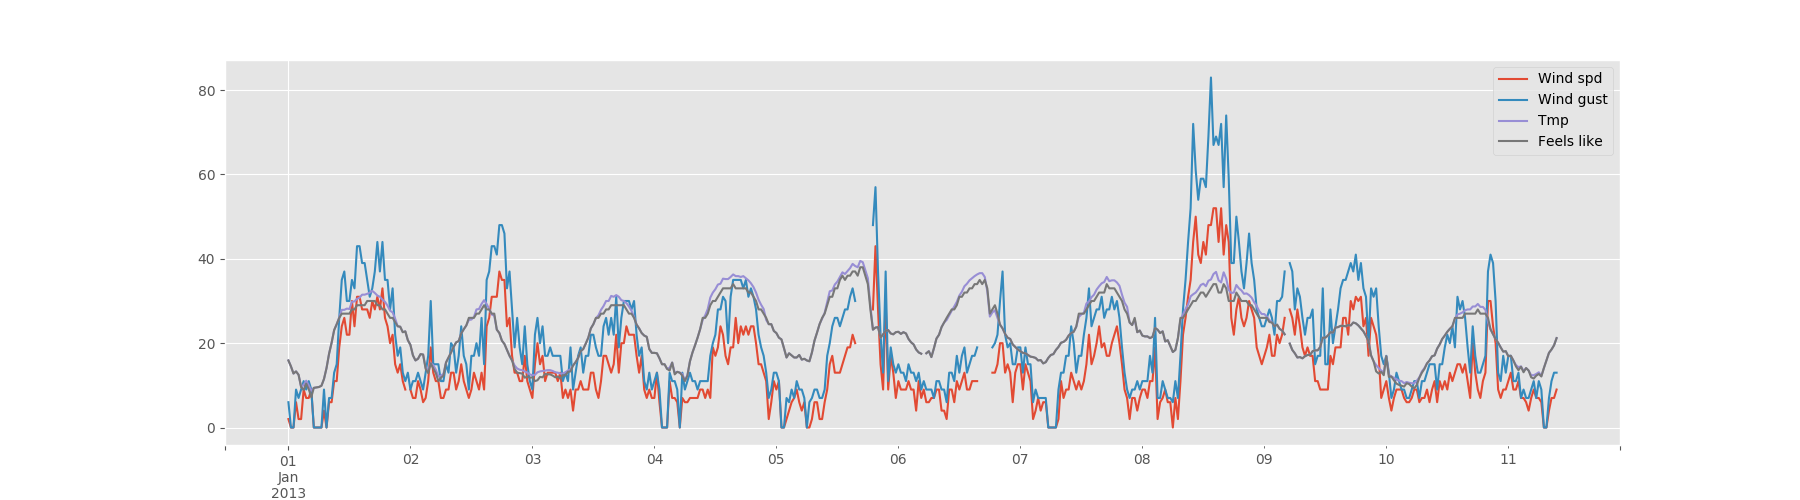

In [17]:
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 5)

# Plot the first 500 entries with selected columns
regular_observations[['Wind spd', 'Wind gust', 'Tmp', 'Feels like']][:500].plot()

In [18]:
# Looking closer, there seem to be gaps around Jan 6th, 7th, and more.
# You need to fill these with something meaningful.
# Interpolate and fill empty rows using: 
# Series.interpolate(): Fill in empty values based on index.

# Interpolate data to fill empty values
for column in regular_observations.columns:
    regular_observations[column].interpolate('time', inplace=True, limit_direction='both')

# Display some interpolated entries    
regular_observations[1633:1638]


,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-02-04 00:30:00,67.5,9.0,15.0,15.1,12.6,15.1,85.0,1.0,0.0,0.0,1020.2
2013-02-04 01:00:00,67.5,6.0,9.0,14.9,12.8,14.9,87.0,1.0,0.0,0.0,1020.2
2013-02-04 01:30:00,67.5,6.0,7.0,15.4,12.9,15.4,85.0,1.0,0.0,0.0,1020.0
2013-02-04 02:00:00,67.5,0.0,0.0,14.7,13.1,14.7,90.0,1.0,0.0,0.0,1019.9
2013-02-04 02:30:00,67.5,0.0,0.0,14.6,13.0,14.6,90.0,1.0,0.0,0.0,1019.9


<IPython.core.display.Javascript object>


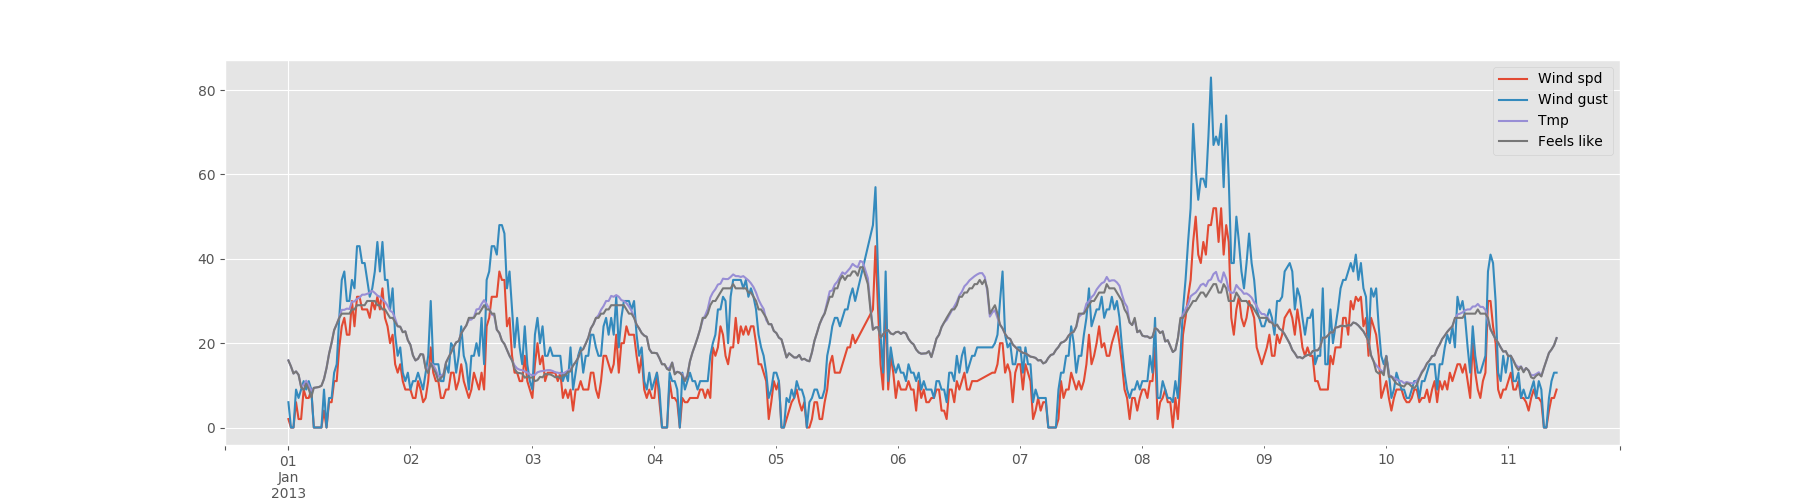

In [19]:
regular_observations[['Wind spd', 'Wind gust', 'Tmp', 'Feels like']][:500].plot()